# Question 2: KNN
# [CM 5] tuning k, accuracy vs k plot and variance

Importing all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Iris Dataset

### Finding best value of K ( KNN classifier ) using 5-Fold Cross validation

In [2]:
df_iris = pd.read_csv("cleaned_data_iris.csv")
x = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]

In [3]:
from sklearn.model_selection import KFold
accuracy_iris=[]
kf = KFold(n_splits=5)
for k in range(1,36):
    accuracy_kfold_iris=[]
    for train, test in kf.split(x):
        x1_train, x1_test, y1_train, y1_test = x.iloc[train],x.iloc[test],y.iloc[train],y.loc[test]
        kfold_knn = KNeighborsClassifier(n_neighbors=k)
        kfold_knn.fit(x1_train,y1_train)
        accuracy_kfold_iris.append(accuracy_score(kfold_knn.predict(x1_test), y1_test))
    accuracy_iris.append(np.mean(accuracy_kfold_iris))
print(accuracy_iris)

[0.9428571428571427, 0.961904761904762, 0.9428571428571427, 0.9428571428571427, 0.9619047619047618, 0.9619047619047618, 0.9619047619047618, 0.9619047619047618, 0.9619047619047618, 0.9428571428571427, 0.9428571428571427, 0.9523809523809522, 0.9428571428571427, 0.9428571428571427, 0.9523809523809523, 0.9428571428571427, 0.9523809523809523, 0.9333333333333332, 0.9428571428571427, 0.9523809523809523, 0.9428571428571428, 0.9333333333333333, 0.9238095238095239, 0.9238095238095239, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.8952380952380953, 0.9047619047619048]


## Accuracy vs K for Iris dataset

Text(0.5, 1.0, 'Accuracy vs K')

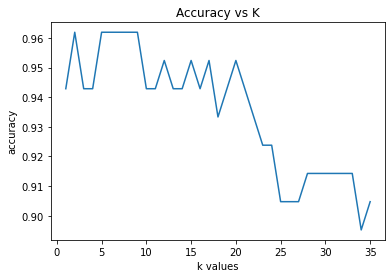

In [4]:
sns.lineplot(y=accuracy_iris,x=range(1,36))
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title("Accuracy vs K")

### The highest accuracy for iris dataset is achieved at K=5 as represented in accuracy vs K graph. 

## Calculating Variance

#### Importing accuracy list for K=5 from  [CM4]

In [5]:
%store -r accuracy_kfold_iris
accuracy_kfold_iris

[0.9523809523809523, 1.0, 0.9523809523809523, 0.9047619047619048, 1.0]

In [6]:
print("The variance of Iris dataset is:", np.var(accuracy_kfold_iris))

The variance of Iris dataset is: 0.00126984126984127


# Heart Dataset

#### Restoring accuracy list from [CM4]

In [7]:
%store -r accuracy_heart
# The accuuracy is calculated using validation datasets as described in the question
print('for K=11 the accuracy using validation set is :',accuracy_heart[10]*100)

for K=11 the accuracy using validation set is : 92.85714285714286


## Accuracy vs K values for Heart dataset using validation set 

Text(0, 0.5, 'k values')

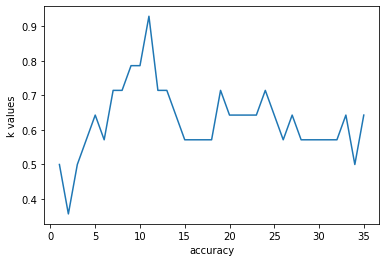

In [8]:
sns.lineplot(y=accuracy_heart,x=range(1,36))
plt.xlabel('accuracy')
plt.ylabel('k values')

## Accuracy on training set

In [9]:
df_heart = pd.read_csv("heart_disease_cleaned.csv")
x = df_heart.iloc[:,:-1]
y = df_heart.iloc[:,-1]
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2,random_state=98)
for k in range(1,36):
    knn_heart = KNeighborsClassifier(n_neighbors=k)
    knn_heart.fit(x1_train,y1_train)
    heart_pred=knn_heart.predict(x1_test)
    print('K:',k,' accuracy:',accuracy_score(heart_pred,y1_test))

K: 1  accuracy: 0.6363636363636364
K: 2  accuracy: 0.6666666666666666
K: 3  accuracy: 0.45454545454545453
K: 4  accuracy: 0.5757575757575758
K: 5  accuracy: 0.5757575757575758
K: 6  accuracy: 0.6363636363636364
K: 7  accuracy: 0.5757575757575758
K: 8  accuracy: 0.6666666666666666
K: 9  accuracy: 0.6363636363636364
K: 10  accuracy: 0.696969696969697
K: 11  accuracy: 0.6363636363636364
K: 12  accuracy: 0.6666666666666666
K: 13  accuracy: 0.6363636363636364
K: 14  accuracy: 0.7272727272727273
K: 15  accuracy: 0.6666666666666666
K: 16  accuracy: 0.6363636363636364
K: 17  accuracy: 0.5757575757575758
K: 18  accuracy: 0.5757575757575758
K: 19  accuracy: 0.5454545454545454
K: 20  accuracy: 0.6060606060606061
K: 21  accuracy: 0.6060606060606061
K: 22  accuracy: 0.5757575757575758
K: 23  accuracy: 0.45454545454545453
K: 24  accuracy: 0.5454545454545454
K: 25  accuracy: 0.48484848484848486
K: 26  accuracy: 0.48484848484848486
K: 27  accuracy: 0.5151515151515151
K: 28  accuracy: 0.484848484848484

### The heart disease dataset achieves 92.85% accuracy at k=11. However, this is an anomaly as its trained on fewer set of observations which might produce inaccuracies . The next best average accuracy for heartdisease dataset is 72.72% at K=14 after performing operations on testing dataset. Thus,  K=14 is selected as the best fit parameter for heart disease dataset.

## Difference between K Fold validation and Train-Validate-Test method

<b> In train-validate-test approach, a subset of observations are used for validating which produces bias in the result. Aditionally, the dataset is trained on a fewer set of observations which might produce inaccuracies like in the above case where we got an accuracy of 92.85% for k=11 but the average accuracy is around 62.65%. The K fold cross validation provides train/test indices to split the data into K consecutive folds. One fold is used for validation and the remaining K-1 folds are used for training. Thus by using all the data available, the bias is significantly reduced. </b>